In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [5]:
df = pd.read_csv('DATA/auto.csv', sep = ',')
df.head()

,mpg,displ,hp,weight,accel,origin,size
0,18.0,250.0,88,3139,14.5,US,15.0
1,9.0,304.0,193,4732,18.5,US,20.0
2,36.1,91.0,60,1800,16.4,Asia,10.0
3,18.5,250.0,98,3525,19.0,US,15.0
4,34.3,97.0,78,2188,15.8,Europe,10.0


In [6]:
del df['origin']

In [7]:
df.dtypes

mpg       float64
displ     float64
hp          int64
weight      int64
accel     float64
size      float64
dtype: object

In [8]:
df.isnull().sum()

mpg       0
displ     0
hp        0
weight    0
accel     0
size      0
dtype: int64

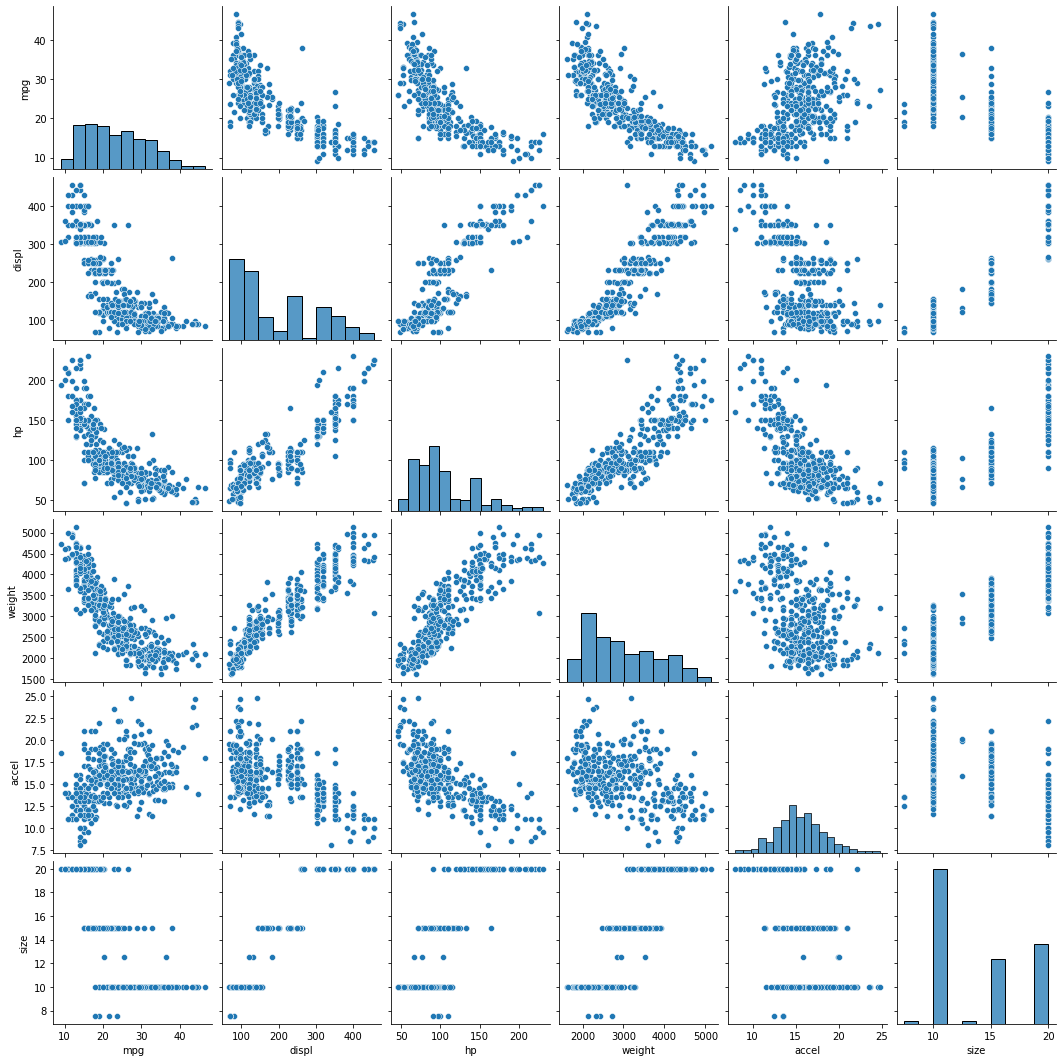

In [9]:
sns.pairplot(df)

In [10]:
X = df.drop(['mpg'], axis=1).values
y = df['mpg'].values

In [11]:
print(y.shape, X.shape)

(392,) (392, 5)


Linear Regression

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=35)

In [13]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(274, 5) (118, 5) (274,) (118,)


In [14]:
reg = LinearRegression()
results = reg.fit(x_train, y_train)
y_pred = results.predict(x_test)


In [15]:
print('Coefficients:{}'.format(results.coef_))
print('MSE:{}'.format(mean_squared_error(y_test, y_pred)))

Coefficients:[-0.00366311 -0.06007958 -0.00453894 -0.23717317 -0.15115576]
MSE:15.832041091860656


In [16]:
reg.score(x_test, y_test)

0.72729586796686

In [27]:
#prediction with the following features
reg.predict([[204, 290, 3720, 15, 12]])

array([9.30269936])

In [18]:
cvscores = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores))

0.6914581154517201


Ridge Regression

In [31]:
ridge = Ridge(alpha =0.2, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)
#[displacement, horsepower, weight, acceleration, size]
ridge.predict([[122, 158, 1256, 8.2, 6]])[0] #HONDA CIVIC 

29.785004843888572

In [20]:
ridge.score(x_test, y_test)

0.7264673801658664